# 1. Introduction 
# The Problem 
=> Customer churn is a critical concern for a telecommunications company due to its direct impact on revenue,
=>high customer acquisition costs, and potential erosion of market share.
=> Additionally, it affects the company's brand image, long-term customer value, and ability to leverage customer data for upselling efforts.
=>Addressing churn is paramount for financial stability, market competitiveness, and sustaining investor confidence.

# 2. Import libraries and data 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv('Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [122]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: >

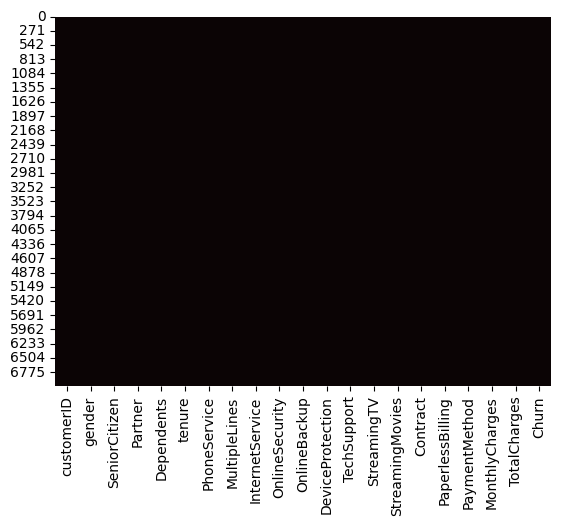

In [124]:
sns.heatmap(df.isnull(), cmap="mako", cbar=False)


# EDA (Exploratory Data Analysis)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# * What is the customer churn rate?

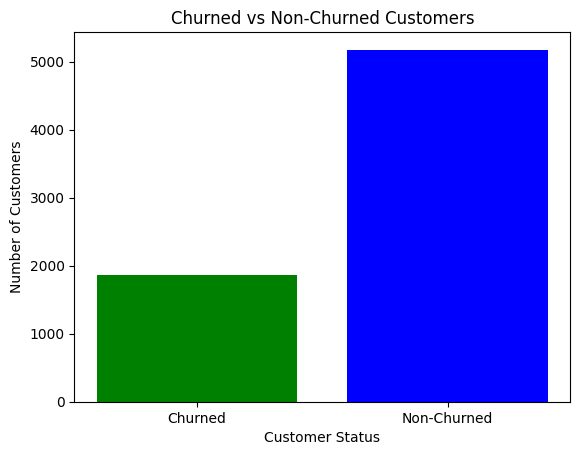

Customer Churn Rate: 26.54%


In [126]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns

# Count the number of churned customers
num_churned = df['Churn'].eq('Yes').sum()    #eq is equal similar as == operator because we are taking sing col as series so operator wont work

# Count the total number of customers
total_customers = len(df)

# Calculate the churn rate
churn_rate = (num_churned / total_customers) * 100

# Create a bar plot
plt.bar(['Churned', 'Non-Churned'], [num_churned, total_customers - num_churned], color=['green', 'blue'])
plt.title('Churned vs Non-Churned Customers')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.show()

print("Customer Churn Rate: {:.2f}%".format(churn_rate))



# * How does Gender and Senior Citizen affect Churn rate?

In [127]:
# Group by 'gender' and 'SeniorCitizen', calculate churn rate for each group
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


gender_churn = df.groupby(['gender', 'SeniorCitizen'])['Churn'].mean().reset_index()

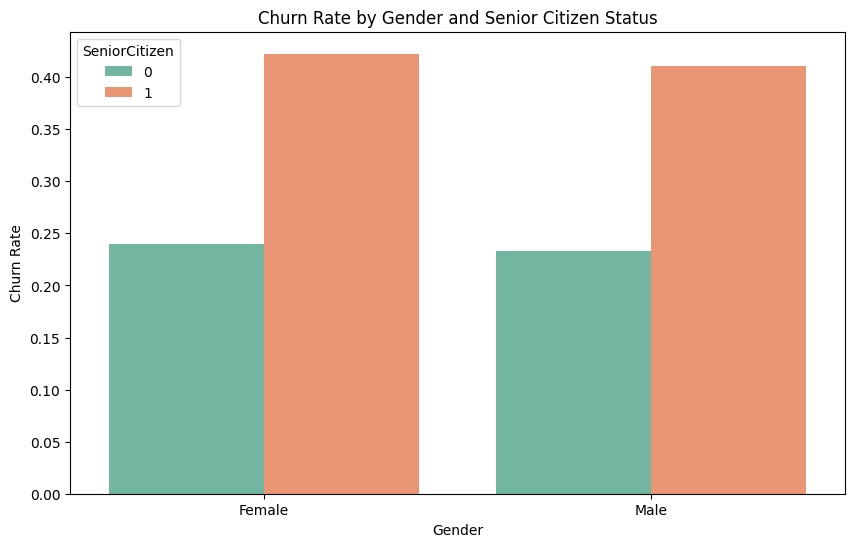

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_churn, x='gender', y='Churn', hue='SeniorCitizen', palette='Set2')
plt.title('Churn Rate by Gender and Senior Citizen Status')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

In [129]:
# Calculate the total number of males and females
total_males = df[df['gender'] == 'Male'].shape[0]
total_females = df[df['gender'] == 'Female'].shape[0]

# Calculate the total number of customers
total_customers = df.shape[0]

# Calculate the percentage of males and females
percentage_males = (total_males / total_customers) * 100
percentage_females = (total_females / total_customers) * 100

print("Percentage of males: {:.2f}%".format(percentage_males))
print("Percentage of females: {:.2f}%".format(percentage_females))


Percentage of males: 50.48%
Percentage of females: 49.52%


# * Does customers having dependents affect customer Churn?

C:\Users\QCS\AppData\Local\Temp\ipykernel_13508\3972347409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dependents_churn, x='Dependents', y='Churn', palette='Set2')


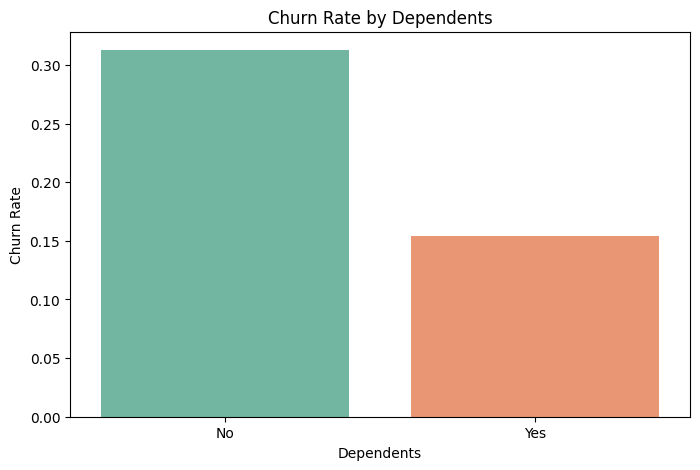

In [130]:
dependents_churn = df.groupby('Dependents')['Churn'].mean().reset_index()

# Plot churn rate by dependents
plt.figure(figsize=(8, 5))
sns.barplot(data=dependents_churn, x='Dependents', y='Churn', palette='Set2')
plt.title('Churn Rate by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')
plt.show()

# * How does customer churn relate with tenure?

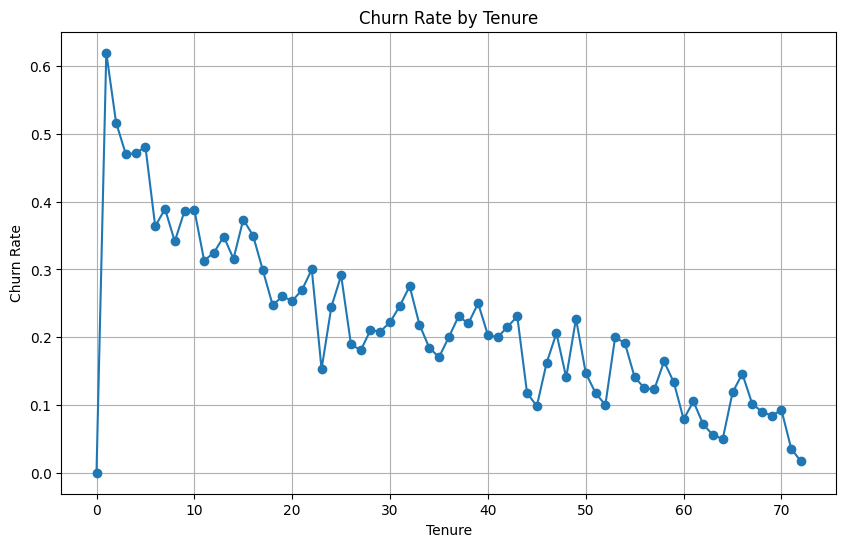

In [131]:
tenure_churn = df.groupby('tenure')['Churn'].mean().reset_index()

# Plot churn rate by tenure
plt.figure(figsize=(10, 6))
plt.plot(tenure_churn['tenure'], tenure_churn['Churn'], marker='o', linestyle='-')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

# * Which contract type has higher churn rate?

C:\Users\QCS\AppData\Local\Temp\ipykernel_13508\3673182887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn, x='Contract', y='Churn', palette='Set2')


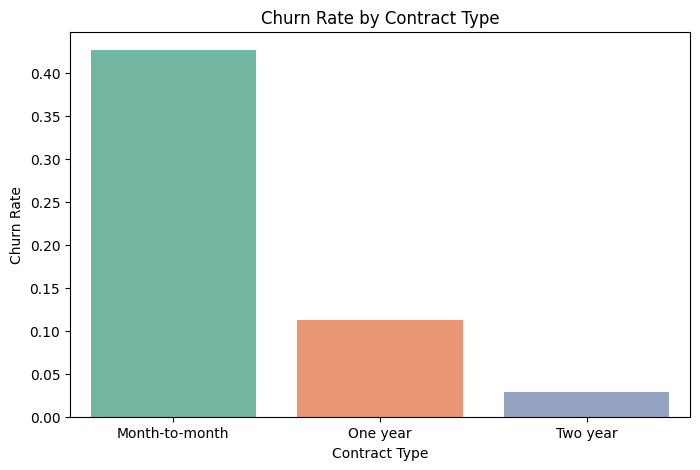

In [132]:
contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()

# Plot churn rate by contract type
plt.figure(figsize=(8, 5))
sns.barplot(data=contract_churn, x='Contract', y='Churn', palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

# * How does the various service provided by the telco company affect churn?

In [133]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

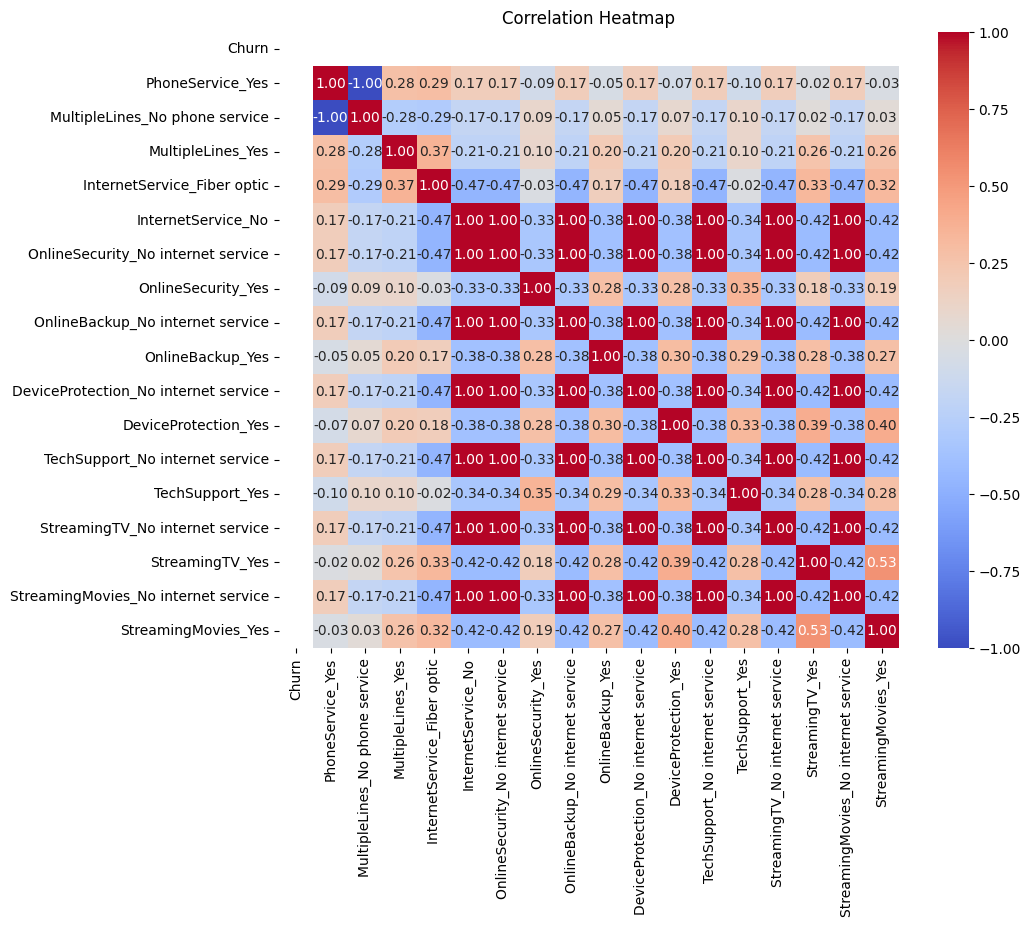

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Selecting the categorical columns representing services
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

# Performing one-hot encoding on categorical variables
encoded_df = pd.get_dummies(df[service_cols], drop_first=True)

# Adding 'Churn' column to the encoded DataFrame
encoded_df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculating the correlation matrix
correlation_matrix = encoded_df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()



In [145]:
# Check unique values and their counts in the 'TechSupport' column
print(df['TechSupport'].value_counts())


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


C:\Users\QCS\AppData\Local\Temp\ipykernel_13508\2980676631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_tech_support, x='TechSupport', y='Churn', palette='Set2')


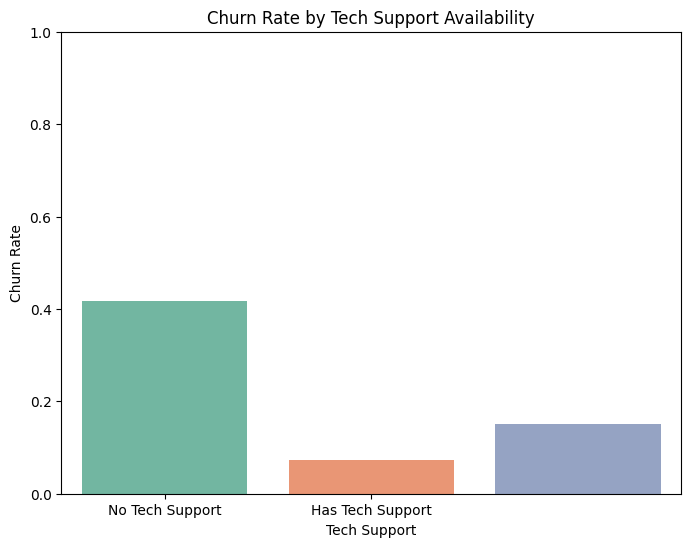

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rate for customers with and without tech support
churn_rate_tech_support = df.groupby('TechSupport')['Churn'].mean().reset_index()

# Plot churn rate by tech support
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_rate_tech_support, x='TechSupport', y='Churn', palette='Set2')
plt.title('Churn Rate by Tech Support Availability')
plt.xlabel('Tech Support')
plt.ylabel('Churn Rate')
plt.xticks(ticks=[0, 1], labels=['No Tech Support', 'Has Tech Support'])
plt.ylim(0, 1)  # Set y-axis limit to show proportions
plt.show()


# * How are the Monthly and Total charges contributing to customer churn?

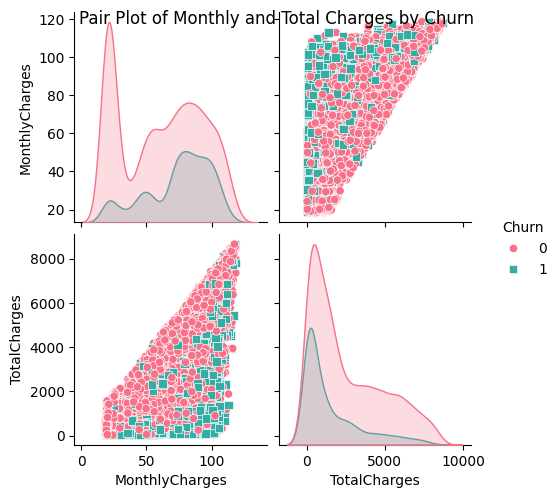

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'MonthlyCharges' and 'TotalCharges' to numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot pair plot
sns.pairplot(df, vars=['MonthlyCharges', 'TotalCharges'], hue='Churn', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot of Monthly and Total Charges by Churn')
plt.show()
